In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import config
from sklearn.linear_model import LinearRegression

In [105]:
species = 'Bacteroides_uniformis_57318'
in_df = pd.read_csv("/u/home/r/rwolff/distances.txt",sep="\t")
pi_df = pd.read_csv(f"~/diversity_ecology/analysis/pi/Poyet/{species}/{species}_pi.txt",index_col=0)

metadir = config.metadata_directory
dates = pd.read_pickle(f"{metadir}Poyet_host_samples_timepoints.pkl")
host = "an"
samples_host = [elem for elem in list(dates[host].index) if elem in set(in_df["sample1"])]

dates_host = np.array(list(dates[host][samples_host]))

samples_host = [s for s in samples_host if s in pi_df.index]
dates_host = np.array(list(dates[host][samples_host]))

samples_host = [s for s in samples_host if s in set(in_df["sample2"])]
dates_host = np.array(list(dates[host][samples_host]))

In [106]:
df = pd.DataFrame(index=set(in_df["sample1"]),columns=set(in_df["sample2"]))

In [107]:
for i,(s1,s2) in zip(range(len(in_df["sample1"])),zip(in_df["sample1"],in_df["sample2"])):
    df.loc[s1,s2] = in_df.iloc[i]["distance"]

In [108]:
gene_distance = np.array(list(df.loc[samples_host,samples_host].iloc[0]))

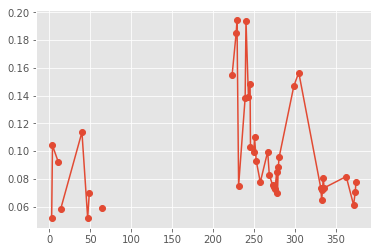

In [109]:
plt.plot(dates_host,gene_distance,"o-")
#plt.ylim([.1,.25])

In [110]:
idx = np.isfinite(dates_host) & np.isfinite(gene_distance) & (gene_distance < 1)

true_slope = np.polyfit(dates_host[idx], gene_distance[idx], 1)[0]

In [111]:
slopes = []
for i in range(10000):
    gd = np.random.permutation(gene_distance)
    idx = np.isfinite(dates_host) & np.isfinite(gd) & (gd < 1)
    slopes.append(np.polyfit(dates_host[idx], gd[idx], 1)[0])

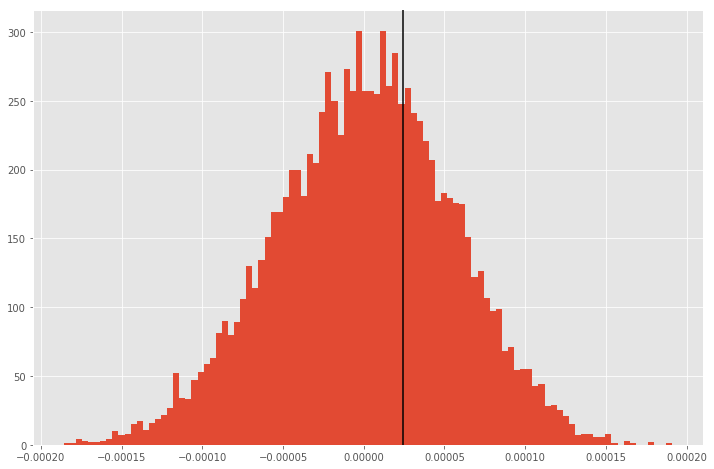

In [112]:
fig,ax = plt.subplots(figsize=(12,8))

ax.hist(slopes,bins=100)
ax.axvline(true_slope,zorder=2000,color="k")

In [113]:
(np.percentile(slopes,95),true_slope)

(8.88484653302878e-05, 2.404684708677504e-05)

In [138]:
samples_host = dates[host].index
samples_host = [s for s in samples_host if s in pi_df.index]
if "SRR9224093" in samples_host:
    pi_df = pi_df.drop("SRR9224093",axis=1)
    pi_df = pi_df.drop("SRR9224093",axis=0)
    samples_host.remove("SRR9224093")
pi = np.array(list(pi_df.loc[samples_host,samples_host[0]]))
dates_host = dates[host][samples_host]

In [139]:
slopes = []
for i in range(10000):
    pi_p = np.random.permutation(pi[1:])
    #idx = np.isfinite(dates_host) & np.isfinite(pi)
    slopes.append(np.polyfit(dates_host[1:], pi_p, 1)[0])

In [141]:
true_slope = np.polyfit(dates_host[1:], pi[1:], 1)[0]

1*(true_slope < slopes).sum()/len(slopes)

0.0

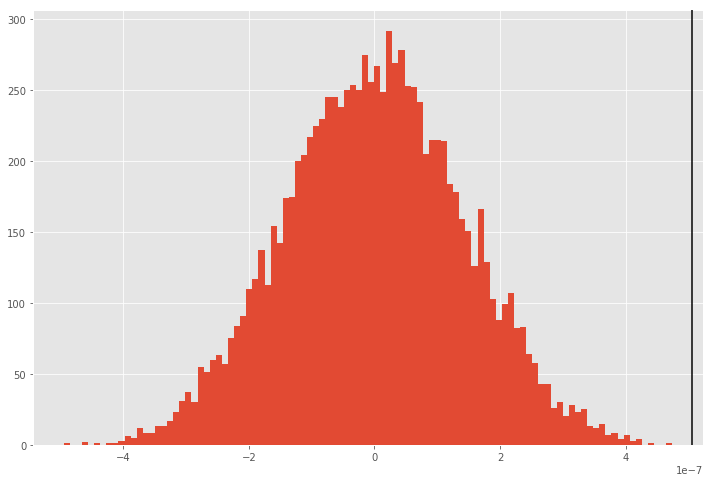

In [142]:
true_slope = np.polyfit(dates_host, pi, 1)[0]

fig,ax = plt.subplots(figsize=(12,8))

ax.hist(slopes,bins=100)
ax.axvline(true_slope,zorder=2000,color="k")

/u/local/apps/python/3.7.2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/u/local/apps/python/3.7.2/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


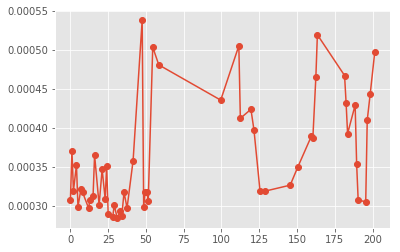

In [143]:
plt.plot(dates_host,pi,"o-")

In [131]:
np.diag(pi_df.loc[samples_host,samples_host]).mean()

0.0002579570958183273